- Check: https://anaconda.org/marsgr6/simulation_home/notebook

### Some important continous distributions

### [Uniform distribution](https://nbviewer.org/github/marsgr6/EN-online/blob/main/continuous_distributions.ipynb#unif)

- Standard uniform distribution $X\sim U(0, 1)$. Left: PDF, Right: CDF.
![](https://i.imgur.com/nncfd7a.png)

- Research the parameters of the distribution in Python. 

- Generate a random vector following the uniform standard distribution and overlap its PDF (see figure below).

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/UhistPDF.png)

Text(0.5, 1.0, 'CDF')

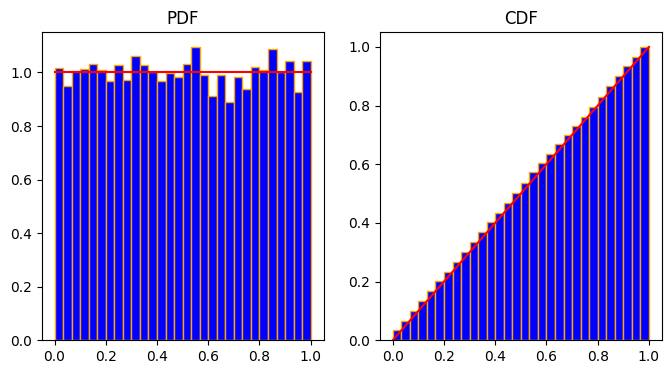

In [ ]:
### Code here
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

vs = 10000  # random vector size
#X_rvs = np.random.random(size=vs)
X_rvs = uniform.rvs(size=vs)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(X_rvs, bins=30, density=True, facecolor="blue", edgecolor="orange");
x = np.linspace(0, 1)
plt.plot(x, uniform.pdf(x), 'r')
plt.title("PDF")

plt.subplot(1,2,2)
plt.plot(x, uniform.cdf(x), 'r')
plt.hist(X_rvs, bins=30, density=True, cumulative=True, facecolor="blue", edgecolor="orange");
plt.title("CDF")

### Sum of random variables

- Generate a random vector $X = \frac{1}{n} \sum_{i=1}^n U_i$, where $U_i \sim U(0, 1)$.

  - Depict your results as follows:

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/sum_of_U.png)

- **Give your conclusions.**

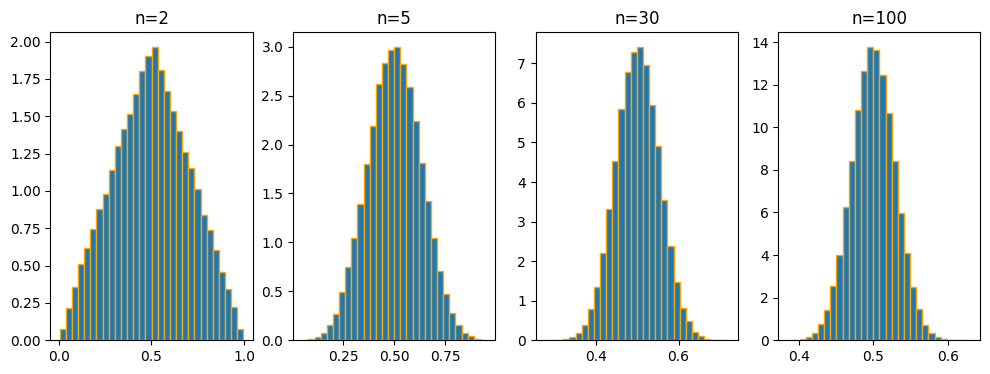

In [ ]:
### Code here
n = [2, 5, 30, 100]  # sample size (number of variable to sum)
vs = 100000  # vector size (simulations)
plt.figure(figsize=(12,4))
for i, ni in enumerate(n):
    plt.subplot(1,4,i+1)
    X_rvs = uniform.rvs(size=(vs, ni)).sum(axis=1)  # change sum for mean
    plt.hist(X_rvs, bins=30, density=True, facecolor="tab:blue", edgecolor="orange");
    plt.title("n="+str(ni))

### Moment generating function (MGF)

$$
M_X(t) = E[e^{tX}]= \left\{
                \begin{array}{ll}
                  \sum_{R(X)} g_X(x)  e^{tx},\ X \text{: discrete rvs,} \\
                  \int_{R(X)} [f_X(x)  e^{tx}] dx,\ X \text{: continuous rvs.}
                \end{array}
              \right.
$$

Using the MGF, we can get the moments of the random variable $X$, $E[X^n]$, deriving the function $n$ times and evaluating for $t=0$.

$$
E[X] = M_x'(t=0)
$$

$$
E[X^2] = M_x''(t=0)
$$

$$
E[X^n] = M_x^n(t=0)
$$

Thus, we can use the MGF to calculate the expected value and variance of $X$.

### MGF determines the distribution

The MGF of a random variable determines its distribution: if two r.v.s have the same MGF, they must have
the same distribution.

### Sum of independent random variables

If $X$ and $Y$ are independent,
then the MGF of $X + Y$ is the product of the individual MGFs:

$$
M_X+Y(t) = M_X(t)M_Y(t).
$$

This is true because if $X$ and $Y$ are independent, then $E[e^{t(X+Y)}] = E[e^{tX}]E[e^{tY}]$.

We can extend this to $n$ variables:

$$W = X_1 + X_n + \cdots + X_n,$$ then

$$
M_W(t) = E[e^{tW}] = E[e^{t(X_1+X_2+\cdots + X_n)}] = E[e^{tX_1}]E[e^{tX_2}] \cdots E[e^{tX_n}]
$$

$$
M_W(t) = M_{X_1}(t) M_{X_2}(t) \dots M_{X_n}(t) 
$$

### Sum of independent normal random variables

If we have a collection of independent normal r.v.s. $X_1 + X_2 + \cdots + X_n$, with $X_i \sim N(\mu_i, \sigma_i^2)$. Then the distribution of $W = X_1 + X_n + \cdots + X_n$, is


$$
W \sim N \left(\sum \mu_i, \sum \sigma_i^2 \right).
$$


**Proof**

The moment generating function of a random variable $X \sim N(\mu, \sigma^2)$ is $M_X(t) = e^{t \mu + 1/2 \sigma^2 t^2}$.

$$
M_W(t) = M_{X_1}(t) M_{X_2}(t) \dots M_{X_n}(t) 
$$

$$
M_W(t) = [e^{t \mu_1 + 1/2 \sigma_1^2 t^2}] [e^{t \mu_2 + 1/2 \sigma_2^2 t^2}] \cdots [e^{t \mu_n + 1/2 \sigma_n^2 t^2}]
$$ 

$$
M_W(t) = e^{t(\mu_1 + \mu_2 + \cdots + \mu_n) + 1/2 t^2 (\sigma_1^2 + \sigma_2^2 + \cdots + \sigma_n^2) }
$$

The last expression corresponds to the MGF of a normal distribution, and given that the MGF determines the distribution, we have that 
$$W \sim N (\mu_1 + \mu_2 + \cdots + \mu_n, \sigma_1^2 + \sigma_2^2 + \cdots + \sigma_n^2).$$

In general if $W = \sum a_i X_i$, we have:

$$
W \sim N \left(\sum a_i \mu_i, \sum a_i^2 \sigma_i^2 \right).
$$

### Central limit theorem

If we have a collection of i.i.d. normal r.v.s. $X_1 + X_2 + \cdots + X_n$, with $X_i \sim N(\mu, \sigma^2)$.

Then for a $n$ large enough we have:

$$
\sum X_i \sim N(n \mu, n \sigma^2) \Rightarrow \frac{\sum X_i - n \mu}{\sigma \sqrt{n}} \sim N(0,1)
$$

$$
\bar{X} = \frac{\sum X_i}{n}  \sim N(\mu, \sigma^2 / n) \Rightarrow \frac{\bar{X} - \mu}{ \sigma / \sqrt{n}} \sim N(0,1)
$$

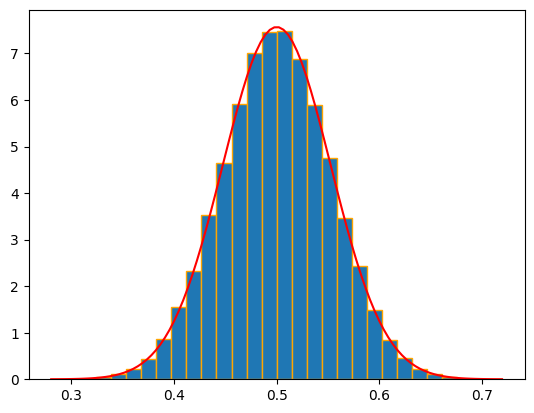

In [ ]:
### Implement the CLT sampling a uniform distribution
ni = 30
X_bar = uniform.rvs(size=(vs, ni)).mean(axis=1)  # change sum for mean
# mu and sigma comes from the uniform distribution
a, b = 0, 1
mu = (a + b) / 2  # mu of Uniform(a, b)
sigma2 = (b-a)**2/12

plt.hist(X_bar, bins=30, density=True, facecolor="tab:blue", edgecolor="orange");

from scipy.stats import norm
x = np.linspace(X_bar.min(), X_bar.max(), 100)
pdfx = norm.pdf(x, mu, np.sqrt(sigma2 /  ni))
plt.plot(x, pdfx, 'r')


### [Normal distribution](https://nbviewer.org/github/marsgr6/EN-online/blob/main/continuous_distributions.ipynb#normal)

- $X \sim N(\mu, \sigma)$

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/norm_mu_sigma.png)

- **Replicate the figure above for the different parameters.** Use and understand the code in the 
[notebook](https://nbviewer.org/github/marsgr6/EN-online/blob/main/continuous_distributions.ipynb#normal).
  - Research the parameters of the distribtuion. 

- Standard normal distribution $X\sim N(0, 1)$.

- Generate a random vector following the normal standard distribution and overlap its PDF (see figure below).

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/NhistPDF.png)

- Generate a simulated sample following the standard normal distribution of size $n=10^4$.

- Generate the following plot to observe the sample:

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/rule689599.png)

- Describe what are you observing. 

- **Give your conclusions.**

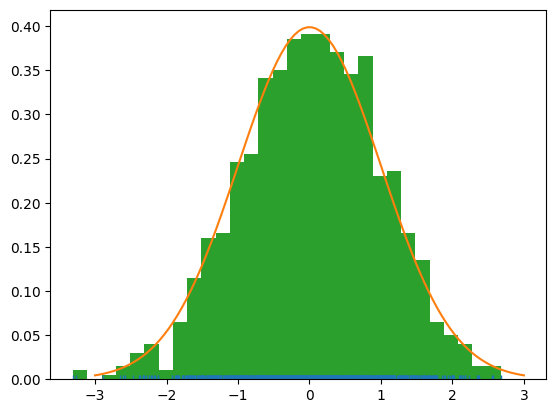

In [ ]:
### Code here: Implement rug plot
X_rvs = norm.rvs(size=1000)
plt.plot(X_rvs, [0]*len(X_rvs), '|')
x = np.linspace(-3, 3, 100)
plt.plot(x, norm.pdf(x))
plt.hist(X_rvs, density=True, bins=30);

### [Exponential distribution](https://nbviewer.org/github/marsgr6/EN-online/blob/main/continuous_distributions.ipynb#expon)

- $X \sim Expon(\lambda)$

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/exp_lambda.png)

- **Replicate the figure above for the different values of the parameter.** Use and understand the code in the 
[notebook](https://nbviewer.org/github/marsgr6/EN-online/blob/main/continuous_distributions.ipynb#expon).
  - Research the parameter of the distribtuion. 
  
- Study the relationship between Poisson and the exponential distribution:

  - Check the code in the [notebook](https://nbviewer.org/github/marsgr6/EN-online/blob/main/continuous_distributions.ipynb#Anexo-2)
  
- **Give your conclusions.**

### Another example of ITS

- **Exponential distribution inverse transform sampling**
- Check: https://udla.brightspace.com/d2l/lor/viewer/view_private.d2l?ou=217304&loIdentId=277, see slides 4-6
  - Check the PDF, CDF and the inverse of the CDF. 

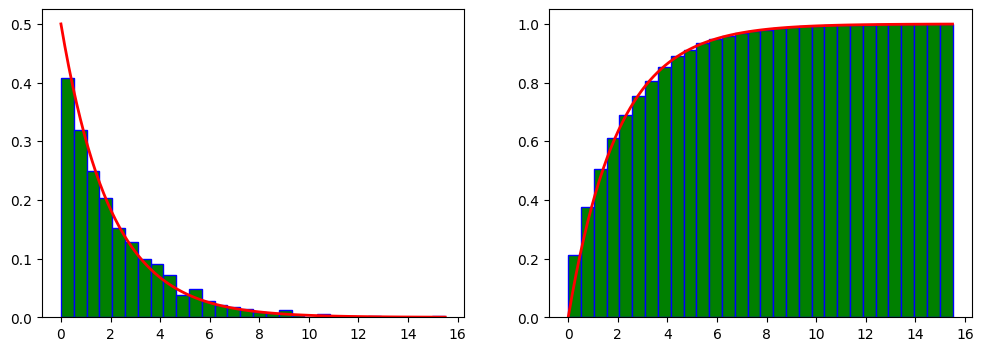

In [ ]:
size = 1000
lam = 0.5

# Let's plot a theoretical pdf
from scipy.stats import expon

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

U = np.random.random(size)
X = -1 / lam * np.log(U)  # quantile function of exp distribution
# Let's check the distribution of X
plt.hist(X, bins=30, density=True, facecolor='green', edgecolor='blue')

x = np.linspace(0, np.max(X), 100)
fx = expon.pdf(x, scale=1/lam)  # expon(0.5) pdf
plot=plt.plot(x, fx, '-r', linewidth=2)

plt.subplot(1,2,2)
Fx = expon.cdf(x, scale=1/lam)  # expon(0.5) pdf
plot=plt.plot(x, Fx, '-r', linewidth=2)
plt.hist(X, bins=30, density=True, cumulative=True, facecolor='green', edgecolor='blue');

### Relationship betweenPoisson and Exponential distribution

- The exponential distribution models the time between events, while the Poisson is used to represent the number of events within a unit of time. Both distributions are a function of the rate parameter, $\lambda$.
- The mean of the exponential distribution is $1/\lambda$
and can be expressed in time units (e.g. sec). 
- $\lambda$ corresponds to the mean in the matching Poisson distribution, and is the expected number of events per unit of time, which would be expressed in inverse time units (e.g. 1/sec).
- Provided that the Poisson distribution makes reference to 1 time unit, the rate parameter 
$\lambda$ is identical in both distributions.
- In the following cell, this relationship is verified by simulation   
- See also the discussion in: https://stats.stackexchange.com/questions/2092/relationship-between-poisson-and-exponential-distribution

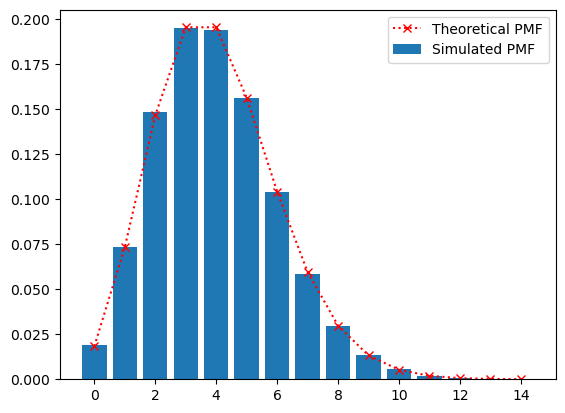

In [ ]:
from scipy.stats import expon
from scipy.stats import poisson

lmbda = 4  # success rate, 4 calls / hour 
beta = 1 / lmbda  # expon implementation in Python requires beta

QF = lambda u: -1/lmbda*np.log(1-u)  # Quantil function 

# Here we are simulating a poisson process (receiving a call/mail, etc.)
def received_calls(t=1):
    # t = 1  corresponds to 1 hour/unit of time
    a = [0.0]  # start timer
    # while the hour is not fulfilled 
    while a[-1] < t:
        #a += [a[-1] + expon.rvs(scale=1/lmbda)]
        # Here you are generating calls, where time between calls is exp(lmbda)
        a += [a[-1] + QF(np.random.random())]  # Look no hands, just ITS

    return len(a[1:-1])  # you did not received a call at 0.0, that was the timer start (why -1)

sims = 100000
Calls = [received_calls() for i in range(sims)]  # Simulate and count calls per hour (Poisson)
x, f = np.unique(Calls, return_counts=True)
plt.bar(x, f/sum(f), label='Simulated PMF')  # Simulated probabilities
plt.plot(x, poisson.pmf(x, lmbda), ':xr', label='Theoretical PMF')  # PMF
legend = plt.legend()

## TO DO: Research

### Statistical Inference

| Ítem | Tema | Binder     | Descargar |
| :---:  | :---------------------------------------------   | :------------ | :------------ |
| 1      | [Estadística Inferencial: Intervalos de confianza](https://nbviewer.org/github/marsgr6/EN-online/blob/main/statistical_inference.ipynb) | [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/marsgr6/EN-online/HEAD?labpath=statistical_inference.ipynb) | [Enlace](https://notebooks.anaconda.org/msgonzalez/statistical_inference/download?version=)  |
|   2    | [Estadística Inferencial: Pruebas de hipótesis](https://nbviewer.org/github/marsgr6/EN-online/blob/main/statistical_tests.ipynb) | [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/marsgr6/EN-online/HEAD?labpath=statistical_tests.ipynb) | [Enlace](https://notebooks.anaconda.org/msgonzalez/statistical_tests/download?version=)  |



### ANOVA

- Investigue el análisis de varianza (ANOVA) de un factor. Este es un método estadístico para examinar las diferencias para las medias entre grupos.
  - Sources:
    - https://online.stat.psu.edu/stat415/lesson/13
    - https://www.reneshbedre.com/blog/anova.html

### Estimación de máxima verosimilitud

- Con anterioridad hemos hecho referencia a estimación de máxima verosimilitud, investigue acerca de estimación de máxima verosimilitud.
  - Sources:
    - https://newonlinecourses.science.psu.edu/stat414/node/289/
    - https://newonlinecourses.science.psu.edu/stat414/node/290/
    
    
### Distribution fitting 
- [En Python](https://anaconda.org/marsgr6/distribution_fitting_python/notebook)
- [En R](https://anaconda.org/marsgr6/distribution_fitting_r/notebook)

## Anexo 1

### Universality of the Uniform  

Let $F$ be a CDF which is a continuous function and strictly increasing on the support of the distribution. 
This ensures that the inverse function $F^{-1}$ exists, as a function from (0, 1) to $\mathbb{R}$. We then have
the following results.

1. Let $U \sim Unif(0, 1)$ and $X = F^{-1}(U)$.
Then $X$ is an r.v. with CDF $F$.
2. Let $X$ be an r.v. with CDF $F$. Then $F(X) \sim Unif(0, 1)$.

### Example:

Let $F$ be a CDF which is a 
continuous function and strictly increasing on the support of the distribution. 
This ensures that the inverse function $F^{-1}$ exists, as a function 
from (0, 1) to $\mathbb{R}$. Then,

1. Let $U \sim Unif(0, 1)$ and $X = F^{-1}(U)$.
Then $X$ is an r.v. with CDF $F$.
2. Let $X$ be an r.v. with CDF $F$. Then $F(X) \sim Unif(0, 1)$.


### Prove by simulation the Universality of the Uniform

- The first part of the theorem says that if we start with $U \sim Unif(0, 1)$ and a CDF $F$, 
then we can create an r.v. whose CDF is $F$ by plugging $U$ into the inverse CDF $F^{-1}$. 
Since  $F^{-1}$ is a function (known as the quantile function), $U$ is a random variable, and a
function of a random variable is a random variable, $F^{-1}(U)$ is a random variable;
universality of the Uniform says its CDF is $F$.
    

**1. Inverse transform sampling**

- Let $f(x) = \frac{x^3}{4}$ for $0 < x < 2$.
- Thus $F(x) = \frac{x^4}{16}$ and $F^{-1}(u) = 2 \times u^{1/4}$.

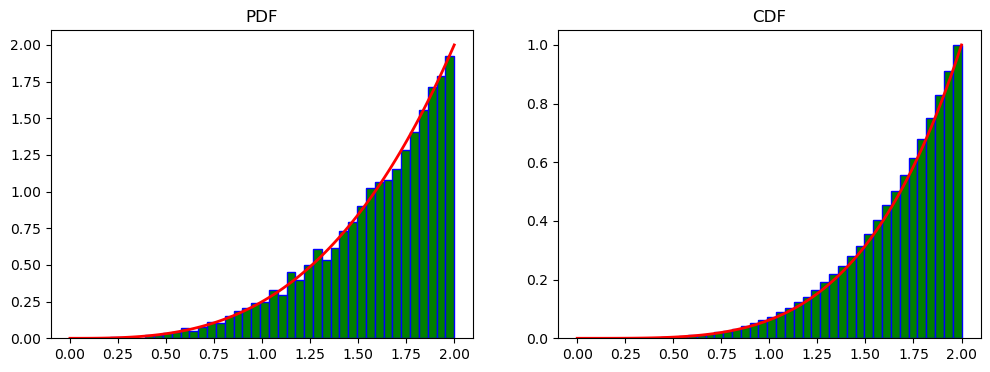

In [ ]:
size = 10000
U = np.random.random(size)  # Uniform distribution r.v.
X = 2*U**(1/4)  # Inverse transform sampling

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Let's plot the PDF
x = np.linspace(0, 2, 100)  # Range of X rvs
fx = x**3 / 4
plt.plot(x, fx, '-r', linewidth=2)  # PDF
h = plt.hist(X, bins=40, density=True, facecolor='green', edgecolor='blue')
plt.title("PDF")

plt.subplot(1,2,2)
# Let's plot the CDF
Fx = x**4 / 16
plt.plot(x, Fx, '-r', linewidth=2)  # CDF
h = plt.hist(X, bins=40, density=True, facecolor='green', edgecolor='blue', cumulative=True)
plt.title("CDF");

**2.The second part of the theorem** goes in the reverse direction, starting from an r.v. $X$
whose CDF is $F$ and then creating a $Unif(0, 1)$ r.v. Again, $F$ is a function, $X$ is a
random variable, and a function of a random variable is a random variable, so $F (X)$
is a random variable. Since any CDF is between 0 and 1 everywhere, $F (X)$ must
take values between 0 and 1. 
Universality of the Uniform says that the distribution
of $F (X)$ is Uniform on (0, 1).

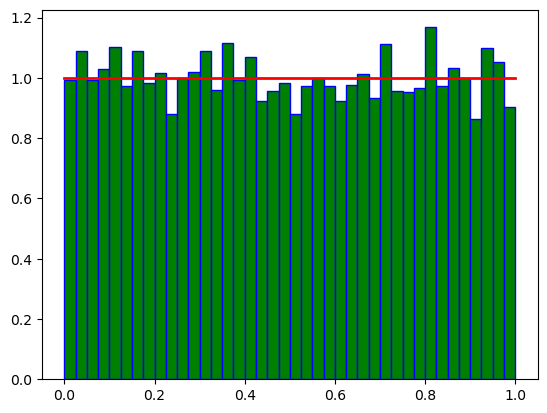

In [ ]:
# We have generated a rvs from the inverse transform sampling

X = 2*U**(1/4)  # Inverse transform sampling
FX = X**4 / 16  # CDF(X)

# Let's check the distribution of FX
plt.hist(FX, bins=40, density=True, facecolor='green', edgecolor='blue')

# Plot the Unif(0,1) pdf
from scipy.stats import uniform
u = np.linspace(0, 1, 2)
fu = uniform.pdf(u)
plot = plt.plot(u, fu, '-r', linewidth=2)  # Unif(0,1) pdf

- **Let's check graphically the inverse transform sampling below**

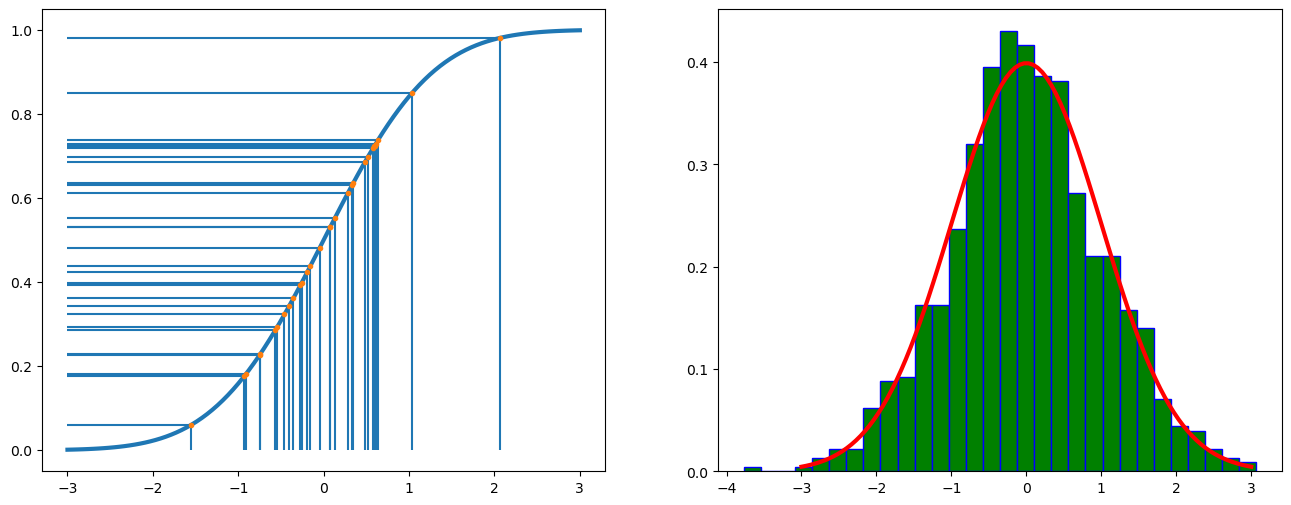

In [ ]:
from scipy.stats import norm

np.random.seed(123)

U = np.random.random(30)  # Unif(0,1)

X = norm.ppf(U)  # F^-1 for a distribution N(0,1)

xn = np.linspace(-3,3,100)  # Support to plot
pdfn = norm.pdf(xn)  # pdf of N(0,1)
cdfn = norm.cdf(xn)  # cdf of N(0,1)

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)  # panel 1

plt.hlines(U, -3, X)  # horizontal lines U(0,1)
plt.vlines(X, 0, U)  # vertical lines sampling result in X

plt.plot(xn, cdfn, linewidth=3)  # plot cdf curve
plt.plot(X, U, '.')  # X result vs U sampling

plt.subplot(1,2,2)  # panel 1

# You already know what is in X, generate 1000 values instead of 30
U = np.random.random(1000)  # Unif(0,1)

X = norm.ppf(U)  # F^-1 for a distribution N(0,1)

plt.hist(X, density=True, bins=30, facecolor='green', edgecolor='blue')
l=plt.plot(xn, pdfn, '-r', linewidth=3)  # plot pdf curve

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>